In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/exploratory-data-analysis-on-netflix-data/netflix_titles_2021.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Type Analysis

In [4]:
df['type']

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

In [5]:
type_count=df['type'].value_counts()
type_percent=df['type'].value_counts(normalize=True)*100
freq_table1=pd.DataFrame({'Frequency':type_count,'Percentage %':type_percent})
freq_table1


,Frequency,Percentage %
type,,
Movie,6131,69.615079
TV Show,2676,30.384921


<Axes: xlabel='type'>

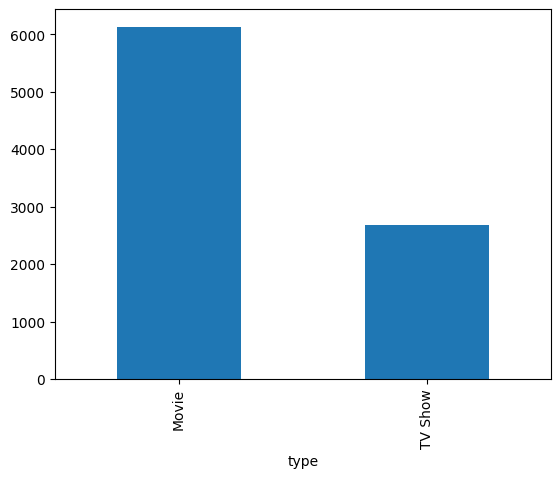

In [6]:
type_count.plot(kind='bar')

- Movies more than TV shows

### Country Analysis

In [7]:
df['country']

0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [8]:
country_count=df['country'].value_counts()
country_percent=df['country'].value_counts(normalize=True)*100
freq_table2=pd.DataFrame({'Frequency':country_count,'Percentage %':country_percent})
freq_table2.head(10)

,Frequency,Percentage %
country,,
United States,2818,35.330993
India,972,12.186560
United Kingdom,419,5.253260
Japan,245,3.071715
South Korea,199,2.494985
Canada,181,2.269308
Spain,145,1.817954
France,124,1.554664
Mexico,110,1.379137


In [9]:
freq_table2.tail(5)

,Frequency,Percentage %
country,,
"Romania, Bulgaria, Hungary",1,0.012538
"Uruguay, Guatemala",1,0.012538
"France, Senegal, Belgium",1,0.012538
"Mexico, United States, Spain, Colombia",1,0.012538
"United Arab Emirates, Jordan",1,0.012538


- Most movies and shows are from United States

### Released Year Analysis

In [10]:
year_counts=df['release_year'].value_counts()
year_percent=df['release_year'].value_counts(normalize=True)*100
freq_table3=pd.DataFrame({'Frequency':year_counts,'Percentage %':year_percent})
freq_table3.head(10)

,Frequency,Percentage %
release_year,,
2018,1147,13.023731
2017,1032,11.717952
2019,1030,11.695242
2020,953,10.820938
2016,902,10.241853
2021,592,6.721926
2015,560,6.358578
2014,352,3.996821
2013,288,3.270126


<Axes: xlabel='release_year'>

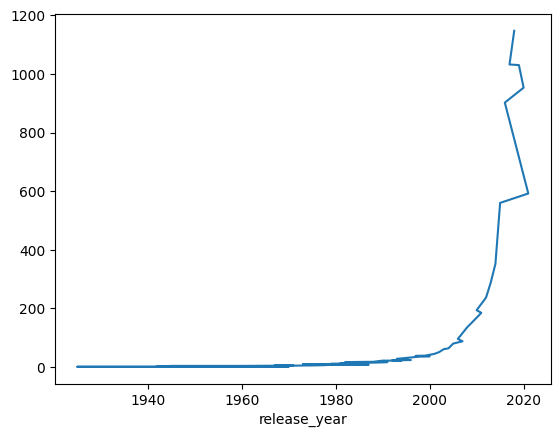

In [11]:
year_counts.plot(kind='line')

- Most of the movies and TV shows released in 2018 

### Director Analysis

In [12]:
moviedf=df[df['type'] == 'Movie']
TVshowdf=df[df['type'] == 'TV Show']
director_movie_counts=moviedf['director'].value_counts().head(10)
director_movie_counts

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

- Director with most movies is **Rajiv Chilaka** 19 Movies

In [13]:
director_TVshow_counts=TVshowdf['director'].value_counts().head(10)
director_TVshow_counts

director
Alastair Fothergill    3
Rob Seidenglanz        2
Hsu Fu-chun            2
Iginio Straffi         2
Shin Won-ho            2
Ken Burns              2
Stan Lathan            2
Thomas Astruc          1
Quek Shio-chuan        1
Elías León             1
Name: count, dtype: int64

- Director with most TV shows on Netflix is **Alastair Fothergill** 3 TV Shows

### Cast Analysis

<Axes: xlabel='cast'>

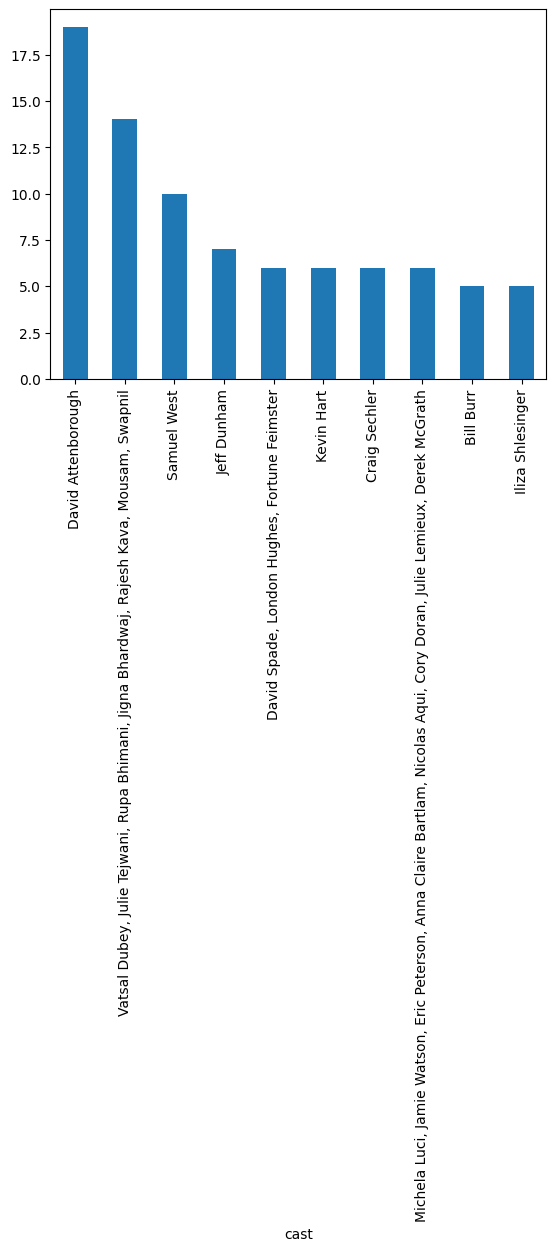

In [14]:
df['cast'].value_counts().nlargest(10).plot(kind='bar')

- Top 10 cast

### Rating Analysis

In [15]:
df['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [16]:
rating_counts=df['rating'].value_counts()
rating_percent=df['rating'].value_counts(normalize=True)*100
freq_table4=pd.DataFrame({'Frequency':rating_counts,'Percentage %':rating_percent})
freq_table4.head(14)


,Frequency,Percentage %
rating,,
TV-MA,3207,36.430762
TV-14,2160,24.537090
TV-PG,863,9.803476
R,799,9.076451
PG-13,490,5.566284
TV-Y7,334,3.794161
TV-Y,307,3.487447
PG,287,3.260252
TV-G,220,2.499148


<Axes: xlabel='rating'>

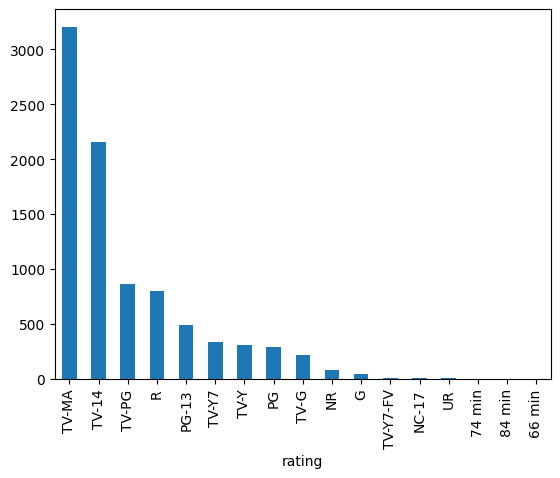

In [17]:
rating_counts.plot(kind='bar')

- TV-MA is the most used rate in Netflix

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Duration Analysis

In [19]:
moviedf['duration'].value_counts()

duration
90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: count, Length: 205, dtype: int64

- Most of the Movies is 90 min

In [20]:
TVshowdf['duration'].value_counts()

duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: count, dtype: int64

- Most of the TV Shows is 1 Season 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### ListedIn Analysis

In [22]:
listedIn_Movie_count=moviedf['listed_in'].value_counts()
listedIn_Movie_percent=moviedf['listed_in'].value_counts(normalize=True)*100
freq_table5=pd.DataFrame({'Frequency':listedIn_Movie_count,'Percentage %':listedIn_Movie_percent})
freq_table5.head(10)

,Frequency,Percentage %
listed_in,,
"Dramas, International Movies",362,5.904420
Documentaries,359,5.855489
Stand-Up Comedy,334,5.447725
"Comedies, Dramas, International Movies",274,4.469092
"Dramas, Independent Movies, International Movies",252,4.110259
Children & Family Movies,215,3.506769
"Children & Family Movies, Comedies",201,3.278421
"Documentaries, International Movies",186,3.033763
"Dramas, International Movies, Romantic Movies",180,2.935900


- Most of the Movies are *Dramas, Internaitional Movies*

In [23]:
listedIn_TVshow_count=TVshowdf['listed_in'].value_counts()
listedIn_TVshow_percent=TVshowdf['listed_in'].value_counts(normalize=True)*100
freq_table6=pd.DataFrame({'Frequency':listedIn_TVshow_count,'Percentage %':listedIn_TVshow_percent})
freq_table6.head(10)


,Frequency,Percentage %
listed_in,,
Kids' TV,220,8.221226
"International TV Shows, TV Dramas",121,4.521674
"Crime TV Shows, International TV Shows, TV Dramas",110,4.110613
"Kids' TV, TV Comedies",99,3.699552
Reality TV,95,3.550075
"International TV Shows, Romantic TV Shows, TV Comedies",94,3.512706
"International TV Shows, Romantic TV Shows, TV Dramas",90,3.363229
"Anime Series, International TV Shows",88,3.288490
Docuseries,85,3.176383


- Most of the TV shows are *kids TV*